### <span style="color:orange">12.1 Preprocessing Images.</span>

#### <span style="color:orange">Importing the Libraries.</span>

In [1]:
## To get something from the Google Drive in Colab

# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
## for google colab
# !pip install tensorflow==2.16.1

In [3]:
## for google colab
# !pip install keras==3.0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
# import matplotlib
# matplotlib.use("TkAgg")

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D

import random

## New
import pickle  # // to unpickle pickled files
import pandas as pd

#### <span style="color:orange">Loading/Opening the files</span>

In [5]:
np.random.seed(0)

with open('traffic-signs\\train.p', 'rb') as file:
    train_data_file = pickle.load(file)

with open('traffic-signs\\test.p', 'rb') as file:
    test_data_file = pickle.load(file)

with open("traffic-signs\\valid.p", "rb") as file:
    validation_data_file = pickle.load(file)

print(type(train_data_file) )

## X_train, y_train, ...
train_images, train_labels = train_data_file["features"], train_data_file["labels"]
test_images, test_labels = test_data_file["features"], test_data_file["labels"]
validation_images, validation_labels = validation_data_file["features"], validation_data_file["labels"]

<class 'dict'>


#### <span style="color:orange">Dataset Parameters.</span>

In [6]:
print(train_images.shape)
print(test_images.shape)
print(validation_images.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


In [7]:
print(train_labels.shape)

(34799,)


#### <span style="color:orange">assert method.</span>

In [8]:
assert (train_images.shape[0] == train_labels.shape[0] ),\
    "The number of images is not equal to the number of labels"
assert (validation_images.shape[0] == validation_labels.shape[0]), \
    "The number of images is not equal to the number of labels"
assert (test_images.shape[0] == test_labels.shape[0]),\
    "The number of images is not equal to the number of labels"

assert (train_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"
assert (validation_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"
assert (test_images.shape[1:] == (32, 32, 3) ),\
    "The dimensions of the images are not 32 x 32 x 3"

#### <span style="color:orange">Using Pandas Library to read the csv file.</span>

In [9]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SDC 2: Running models/section 12: Traffic signs/signnames.csv')

print("Dataset = \n", dataset)

Dataset = 
     ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                

#### <span style="color:orange">Plotting Samples of the Traffic data (from (10.1) MNIST for clarification).</span>

<ipython-input-10-834882a50e21>:11: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


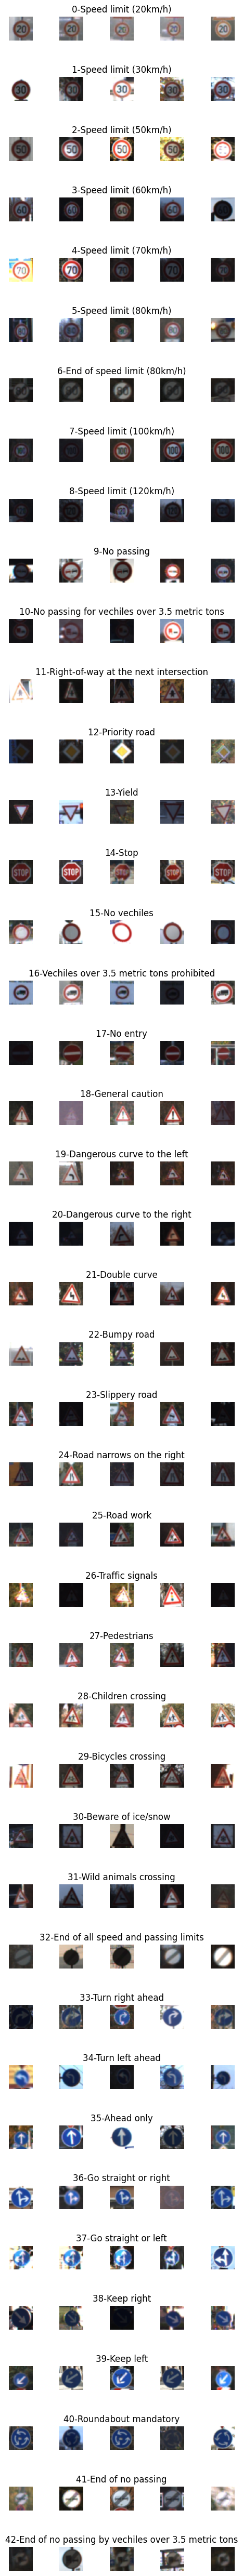

In [10]:
number_of_samples = []
number_of_classes = 43
cols = 5

fig, axes = plt.subplots(nrows=number_of_classes, ncols=cols, figsize=(5, 50),
                         layout='constrained')
# // figsize is the size of each grid (subplot), first the width then the height\

# fig.subplots_adjust( left=None, bottom=None,  right=None, top=None, wspace=None, hspace=None)

fig.tight_layout()
# // this is used to automatically deal with overlapping and separates the figures/subplots better

for col in range(cols): # // each col of the 5
    for r_index, row_info in dataset.iterrows(): # // each row(class) of the 10
        image_selected = train_images[train_labels == r_index]

        axes[r_index][col].imshow(image_selected[random.randint(0, (len(image_selected) - 1) ), : , : ],
                          cmap=plt.get_cmap("gray") )
        axes[r_index][col].axis("off")

        if col == 2:
            axes[r_index][col].set_title(str(r_index) + "-" + row_info["SignName"])

            number_of_samples.append(len(image_selected) )

#### <span style="color:orange">Bar plot to show the number of images each Class has.</span>

In [11]:
print(number_of_samples)

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


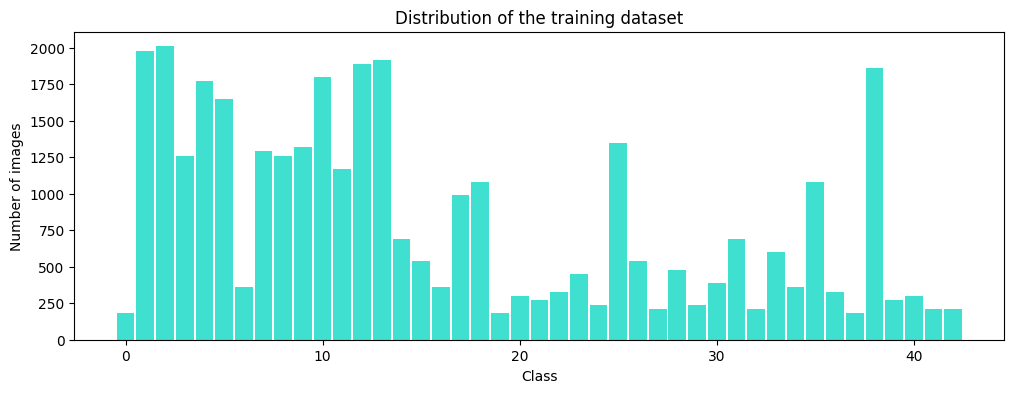

In [12]:
plt.figure(figsize=(12, 4) )
plt.bar(range(0, number_of_classes), number_of_samples, color="turquoise", width=0.9)
plt.title('Distribution of the training dataset')
plt.xlabel('Class')
plt.ylabel('Number of images')

plt.show()

#### <span style="color:orange">Preprocessing the images.</span>

**We will focus on a random photo then apply the same to the rest.**

In [13]:
import cv2

In [14]:
# random_image = cv2.imread(train_images[1000] )
# cv2.imshow("Random Image", random_image)
# cv2.waitKey(0)

**Error: Expected 'filename' to be a str or path-like object**

**That's why we will use plt.imshow() instead**

Image shape: (32, 32, 3)
Label of the pic: 36


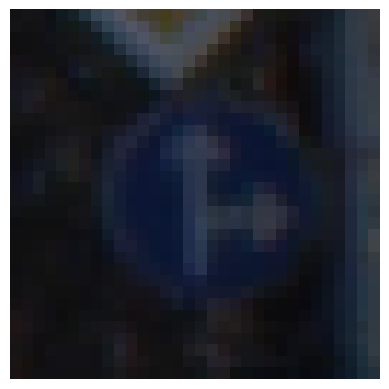

In [15]:
plt.imshow(train_images[1000])
plt.axis('off')
print("Image shape:", train_images[1000].shape)
print("Label of the pic:" , train_labels[1000] )

##### <span style="color:orange">1. grayscale</span>

In [16]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

Image shape: (32, 32)


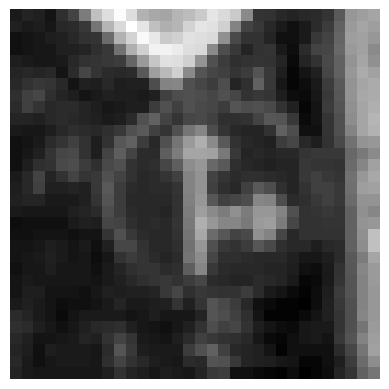

In [17]:
random_image = grayscale(train_images[1000] )

plt.imshow(random_image, cmap=plt.get_cmap("gray") )
plt.axis('off')
print("Image shape:", random_image.shape)

##### <span style="color:orange">2. Histogram Equalization</span>

In [18]:
def histogram_equalize(img):
    cv2.equalizeHist(img)
    return img

(32, 32)


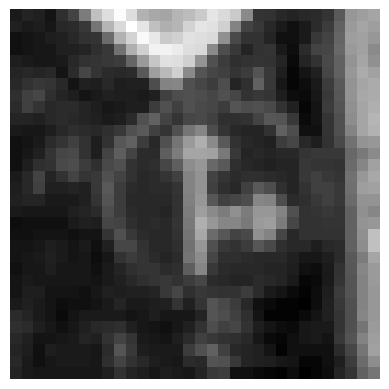

In [19]:
random_image = histogram_equalize(random_image)
plt.imshow(random_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
print(random_image.shape)

##### <span style="color:orange">3. Normalization</span>

In [20]:
def preprocessing_image(img):
    img = grayscale(img)
    img = histogram_equalize(img)
    img = img / 255
    return img

In [21]:
train_images_preprocessed = np.array(list(map(preprocessing_image, train_images) ) )
validation_images_preprocessed = np.array(list(map(preprocessing_image, validation_images) ) )
test_images_preprocessed = np.array(list(map(preprocessing_image, test_images) ) )

(-0.5, 31.5, 31.5, -0.5)

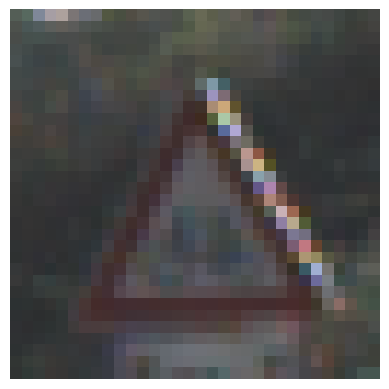

In [22]:
random_index = random.randint(0, len(train_images) - 1)

random_image = plt.imshow(train_images[random_index] )
plt.axis('off')

train images preprocessed shape:  (34799, 32, 32)


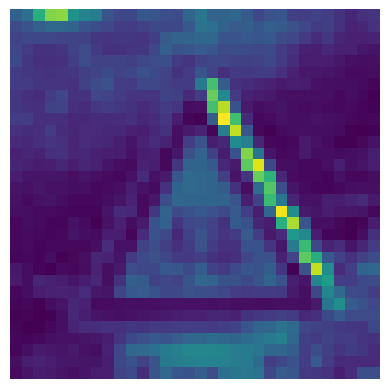

In [23]:
random_image_preprocessed = plt.imshow(train_images_preprocessed[random_index] )
plt.axis('off')
print("train images preprocessed shape: ", train_images_preprocessed.shape)

##### <span style="color:orange">4. Reshaping</span>

In [24]:
train_images_preprocessed = train_images_preprocessed.reshape(34799, 32, 32, 1)
test_images_preprocessed = test_images_preprocessed.reshape(12630, 32, 32, 1)
validation_images_preprocessed = validation_images_preprocessed.reshape(4410, 32, 32, 1)

**<span style="color:orange">**12.5 Data Augmentation</span>**

In [25]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
                                    zoom_range=0.2, shear_range=0.1, rotation_range=10)

vertical_flip=True , horizontal_flip=True

shouldn't be added here because they can impact the traffic signs directions and would make it hard even for humans to understand.





In [26]:
data_generator.fit(x=train_images_preprocessed)
batches = data_generator.flow(x=train_images_preprocessed, y=train_labels,
                              batch_size=20)
## using python command next
train_images_batch, train_labels_batch = next(batches)

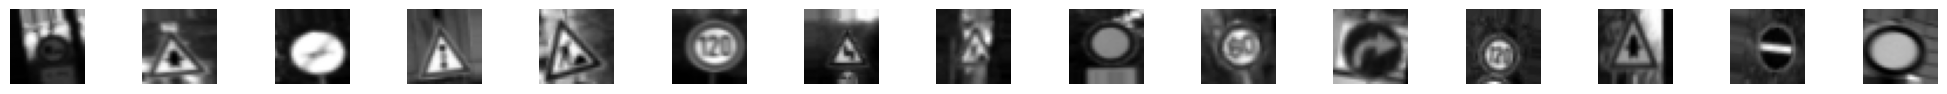

In [27]:
## Plotting the batches

fig, axes = plt.subplots(nrows=1, ncols=15, figsize=(20, 5) )
fig.tight_layout()

for i in range(15):
    axes[i].imshow(train_images_batch[i].reshape(32, 32), cmap=plt.get_cmap('gray') )
    axes[i].axis('off')

##### <span style="color:orange">5. One Hot Encoding</span>

In [28]:
train_labels = to_categorical(train_labels, num_classes=43)
test_labels = to_categorical(test_labels, num_classes=43)
validation_labels = to_categorical(validation_labels, num_classes=43)

___

### <span style="color:orange">12.2 LeNet Architecture Implementation</span>

##### <span style="color:orange">LeNet model Architecture and Compilation</span>

In [63]:
def leNet_modified_model():
    model = Sequential()
    ## Conv layers
    model.add(Conv2D(input_shape=(32, 32, 1) , filters=60, kernel_size=(5, 5), strides=1,
                     activation="relu") )
    model.add(Conv2D(filters=60, kernel_size=(5, 5), strides=1,
                     activation="relu") )
    model.add(Conv2D(filters=60, kernel_size=(5, 5), strides=1,
                     activation="relu") )
    ## Pooling Layer
    model.add(MaxPooling2D(pool_size=(2, 2) ) )
    ## Conv layer
    model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu') )
    model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu') )
    model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu') )
    ## Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2) ) )
    ## Another Dropout layer
    model.add(Dropout(rate=0.1) )
    ## Flatten layer
    model.add(Flatten() )
    ## DNN layers/ hidden layers
    model.add(Dense(units=500, activation="relu") )
    ## Dropout layer
    model.add(Dropout(rate=0.4) )
    ## DNN layers/ hidden layers
    model.add(Dense(units=500, activation='relu'))
    ## Output layer (classification)
    model.add(Dense(units=number_of_classes, activation="softmax") )


    ## Compilation
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',
                  metrics=['accuracy'] )

    return model

In [64]:
nn_model = leNet_modified_model()

print(nn_model.summary() )

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                  │ (None, 28, 28, 60)            │       1,560 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_7 (Conv2D)                  │ (None, 24, 24, 60)            │      90,060 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_8 (Conv2D)                  │ (None, 20, 20, 60)            │      90,060 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_2 (MaxPooling2D)     │ (None, 10, 10, 60)            │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_9 (Conv2D)                  │ (None, 8, 8, 30)              │      16,230 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_10 (Conv2D)                 │ (None, 6, 6, 30)              │       8,130 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ conv2d_11 (Conv2D)                 │ (None, 4, 4, 30)              │       8,130 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ max_pooling2d_3 (MaxPooling2D)     │ (None, 2, 2, 30)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_2 (Dropout)                │ (None, 2, 2, 30)              │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ flatten_1 (Flatten)                │ (None, 120)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ (None, 500)                   │      60,500 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dropout_3 (Dropout)                │ (None, 500)                   │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ (None, 500)                   │     250,500 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_5 (Dense)                    │ (None, 43)                    │      21,543 │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 546,713 (2.09 MB)

 Trainable params: 546,713 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

None


****All parameters are described in the NB**

##### <span style="color:orange">Fitting the Model/ fit.generator</span>

**fit.generator is deprecated**

**The new way of using ImageDataGenerator is like this:*

In [31]:
# nn_model_fit = nn_model.fit(x=train_images_preprocessed, y=train_labels,
#                             validation_data=(validation_images_preprocessed, validation_labels),
#                             epochs=12, batch_size=400, verbose=True, shuffle=True)

In [65]:
train_images_preprocessed.shape

(34799, 32, 32, 1)

In [66]:
from keras.models import load_model

nn_model = load_model('12.5.CNN_model_traffic_signs_augmented.keras')

In [67]:
nn_model_fit_generator = nn_model.fit(data_generator.flow(train_images_preprocessed, train_labels,
                                                          batch_size=200),
                                      steps_per_epoch=len(train_images_preprocessed[0]) // 200,

                                      validation_data=(validation_images_preprocessed, validation_labels),
                                      epochs=4, batch_size=400, verbose=True, shuffle=True)

Epoch 1/4
174/174 ━━━━━━━━━━━━━━━━━━━━ 526s 3s/step - accuracy: 0.9730 - loss: 0.0870 - val_accuracy: 0.9873 - val_loss: 0.0602
Epoch 2/4
174/174 ━━━━━━━━━━━━━━━━━━━━ 560s 3s/step - accuracy: 0.9732 - loss: 0.0915 - val_accuracy: 0.9916 - val_loss: 0.0301
Epoch 3/4
174/174 ━━━━━━━━━━━━━━━━━━━━ 522s 3s/step - accuracy: 0.9770 - loss: 0.0783 - val_accuracy: 0.9900 - val_loss: 0.0372
Epoch 4/4
174/174 ━━━━━━━━━━━━━━━━━━━━ 558s 3s/step - accuracy: 0.9801 - loss: 0.0675 - val_accuracy: 0.9912 - val_loss: 0.0404


**34,800 (batch_size:200 * 174) is the max number of augmented images you can make. Maybe for the amount of traffic data here and not in general.**

##### <span style="color:orange">Saving/Loading the model.</span>

In [68]:
from keras.models import load_model

# // creates a HDF5 file nn_model.save('my_model.h5')  # / the hdf5 is wrong(old way)

# // creates a keras file (new way of saving)
nn_model.save('12.5.CNN_model_traffic_signs_augmented.keras')

# // deletes the existing model
# del nn_model

# // returns a compiled model
nn_model = load_model('12.5.CNN_model_traffic_signs_augmented.keras')

#### <span style="color:orange">Plotting model info</span>

##### <span style="color:orange">Accuracy plot</span>

In [35]:
'''
plt.plot(nn_model_fit.history['accuracy'], label= "train accuracy", color="blue" )
plt.plot(nn_model_fit.history['val_accuracy'], label="val accuracy", color="green" )

plt.xlabel('epochs')
# plt.legend(['accuracy'] )
plt.legend()
plt.title('Accuracies')
plt.show()
'''

'\nplt.plot(nn_model_fit.history[\'accuracy\'], label= "train accuracy", color="blue" )\nplt.plot(nn_model_fit.history[\'val_accuracy\'], label="val accuracy", color="green" )\n\nplt.xlabel(\'epochs\')\n# plt.legend([\'accuracy\'] )\nplt.legend()\nplt.title(\'Accuracies\')\nplt.show()\n'

##### <span style="color:orange">Loss plot</span>

In [36]:
'''
loss_plot = plt.plot(nn_model_fit.history['loss'], label = 'train loss', color = "red" )
val_loss_plot = plt.plot(nn_model_fit.history['val_loss'], label='val loss', color = "orange")

plt.xlabel('epochs')
# plt.legend(['loss'] )
plt.legend()
plt.title('Losses')
plt.show()
'''

'\nloss_plot = plt.plot(nn_model_fit.history[\'loss\'], label = \'train loss\', color = "red" )\nval_loss_plot = plt.plot(nn_model_fit.history[\'val_loss\'], label=\'val loss\', color = "orange")\n\nplt.xlabel(\'epochs\')\n# plt.legend([\'loss\'] )\nplt.legend()\nplt.title(\'Losses\')\nplt.show()\n'

#### <span style="color:orange">Evaluating the Model</span>

In [69]:
nn_model_score = nn_model.evaluate(test_images_preprocessed, test_labels, verbose=0)

print("Test score: ", nn_model_score[0] * 100 , "%")
print("Test accuracy: ", nn_model_score[1] * 100 , "%")

Test score:  19.448336958885193 %
Test accuracy:  96.92003130912781 %


___

### <span style="color:orange">12.3 Fine-Tuning the Model</span>

**1. accuracy wasn't as good as we wanted**


**2. overfitting of the data**

#### <span style="color:orange">Combating the first issue</span>

**1. changed learning_rate from 0.01 to 0.001**

**2. Increasing the number of filters in the Conv layers**

**3. Increasing Conv layers**

#### <span style="color:orange">Combating the second issue</span>

**1. Increasing the number of Dropout layers**

___

### <span style="color:orange">12.4 Testing the model on url images</span>

##### <span style="color:orange">Fetching the image</span>

In [70]:
import requests
from PIL import Image

In [71]:
url1 = ('https://c8.alamy.com/comp/J2MRAJ/'
        'german-road-sign-bicycles-crossing-J2MRAJ.jpg')
url2 = ('https://c8.alamy.com/comp/G667W0/'
        'road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg')
url3 = ('https://c8.alamy.com/comp/A0RX23/'
        'cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg')
url4 = ('https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/'
        '64914157-german-road-sign-slippery-road.jpg')
url5 = ('https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/'
        '5155701-german-traffic-sign-no-205-give-way.jpg')

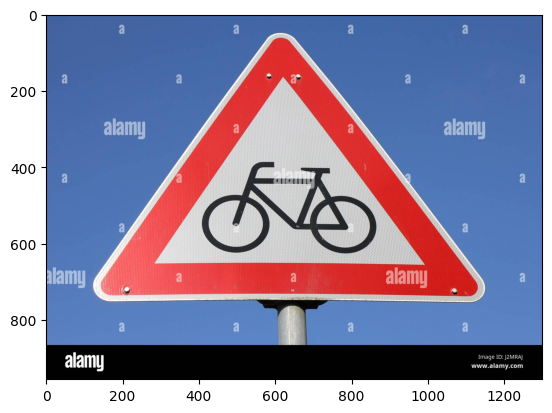

In [72]:
r = requests.get(url1, stream=True)
url_image1 = Image.open(r.raw)
plt.imshow(url_image1, cmap=plt.get_cmap('gray') )

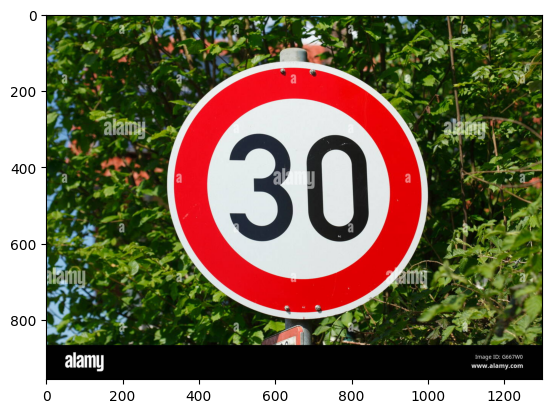

In [73]:
r = requests.get(url2, stream=True)
url_image2 = Image.open(r.raw)
plt.imshow(url_image2, cmap=plt.get_cmap('gray') )

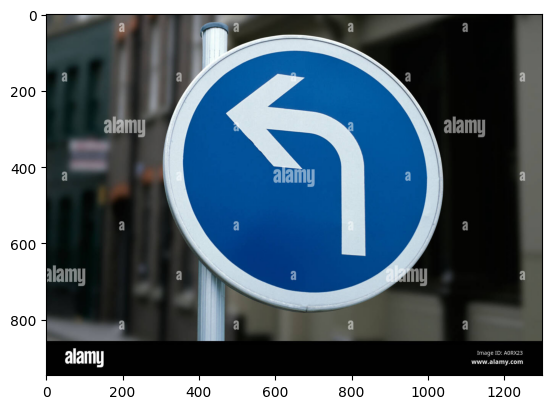

In [74]:
r = requests.get(url3, stream=True)
url_image3 = Image.open(r.raw)
plt.imshow(url_image3, cmap=plt.get_cmap('gray') )

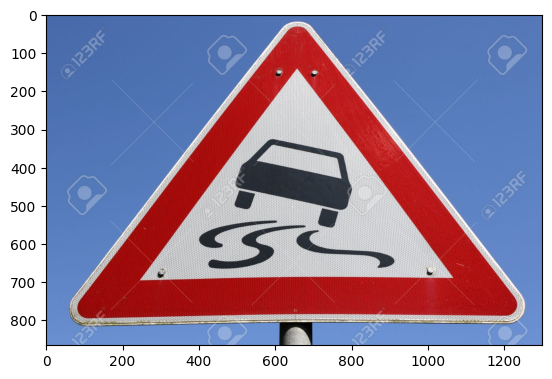

In [75]:
r = requests.get(url4, stream=True)
url_image4 = Image.open(r.raw)
plt.imshow(url_image4, cmap=plt.get_cmap('gray') )

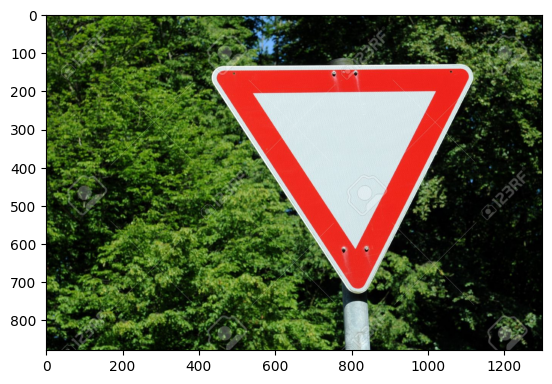

In [76]:
r = requests.get(url5, stream=True)
url_image5 = Image.open(r.raw)
plt.imshow(url_image5, cmap=plt.get_cmap('gray') )

##### <span style="color:orange">Preprocessing image</span>

In [77]:
## New two steps because the url images are different than the ones I fit the model on.
def preprocessing_url_images(img):
    img = np.asarray(img)
    img = cv2.resize(img, (32, 32) )
    img = grayscale(img)
    img = histogram_equalize(img)
    img = img / 255

    return img

(32, 32)


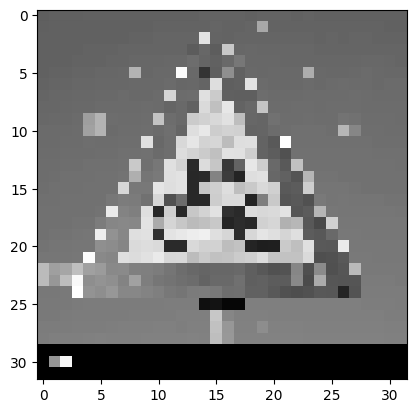

In [78]:
url_image1_preprocessed = preprocessing_url_images(url_image1)
plt.imshow(url_image1_preprocessed, cmap=plt.get_cmap('gray') )
print(url_image1_preprocessed.shape)

(32, 32)


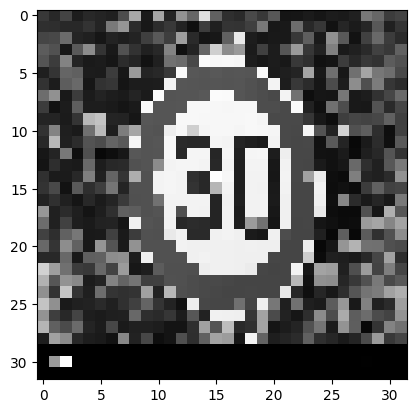

In [79]:
url_image2_preprocessed = preprocessing_url_images(url_image2)
plt.imshow(url_image2_preprocessed, cmap=plt.get_cmap('gray') )
print(url_image2_preprocessed.shape)

(32, 32)


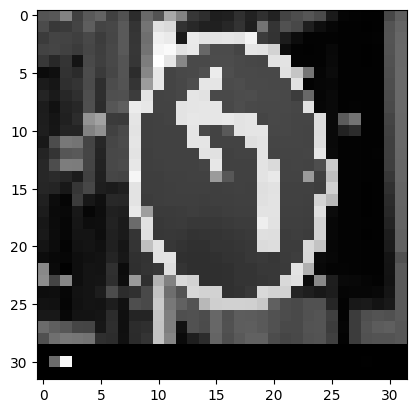

In [80]:
url_image3_preprocessed = preprocessing_url_images(url_image3)
plt.imshow(url_image3_preprocessed, cmap=plt.get_cmap('gray') )
print(url_image3_preprocessed.shape)

(32, 32)


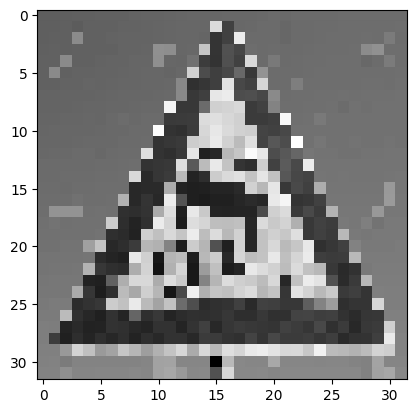

In [81]:
url_image4_preprocessed = preprocessing_url_images(url_image4)
plt.imshow(url_image4_preprocessed, cmap=plt.get_cmap('gray') )
print(url_image4_preprocessed.shape)

(32, 32)


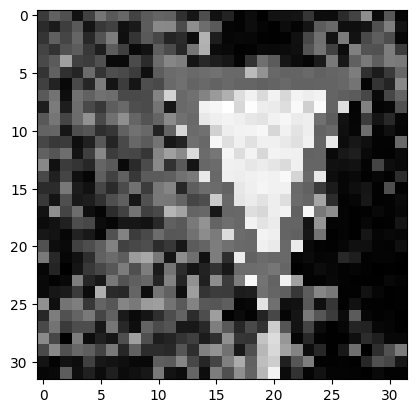

In [82]:
url_image5_preprocessed = preprocessing_url_images(url_image5)
plt.imshow(url_image5_preprocessed, cmap=plt.get_cmap('gray') )
print(url_image5_preprocessed.shape)

In [83]:
## Reshaping the pics for the prediction of the model

url_image1_preprocessed = url_image1_preprocessed.reshape(1, 32, 32, 1)
url_image2_preprocessed = url_image2_preprocessed.reshape(1, 32, 32, 1)
url_image3_preprocessed = url_image3_preprocessed.reshape(1, 32, 32, 1)
url_image4_preprocessed = url_image4_preprocessed.reshape(1, 32, 32, 1)
url_image5_preprocessed = url_image5_preprocessed.reshape(1, 32, 32, 1)

##### <span style="color:orange">Predicting the class number of the pics</span>

In [84]:
## To print the class name

sign_names = []

for sign_class_name in dataset.SignName:
    print(sign_class_name)
    sign_names.append(sign_class_name)

Speed limit (20km/h)
Speed limit (30km/h)
Speed limit (50km/h)
Speed limit (60km/h)
Speed limit (70km/h)
Speed limit (80km/h)
End of speed limit (80km/h)
Speed limit (100km/h)
Speed limit (120km/h)
No passing
No passing for vechiles over 3.5 metric tons
Right-of-way at the next intersection
Priority road
Yield
Stop
No vechiles
Vechiles over 3.5 metric tons prohibited
No entry
General caution
Dangerous curve to the left
Dangerous curve to the right
Double curve
Bumpy road
Slippery road
Road narrows on the right
Road work
Traffic signals
Pedestrians
Children crossing
Bicycles crossing
Beware of ice/snow
Wild animals crossing
End of all speed and passing limits
Turn right ahead
Turn left ahead
Ahead only
Go straight or right
Go straight or left
Keep right
Keep left
Roundabout mandatory
End of no passing
End of no passing by vechiles over 3.5 metric tons


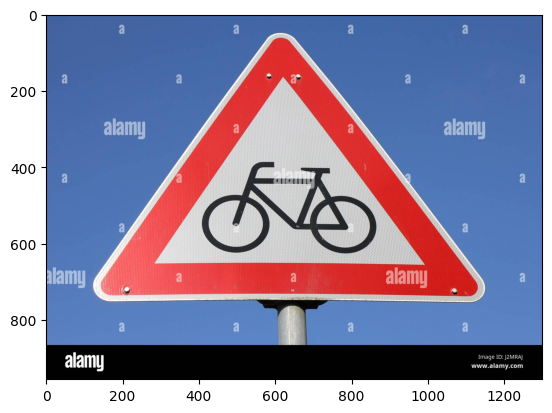

In [85]:
r = requests.get(url1, stream=True)
url_image1 = Image.open(r.raw)
plt.imshow(url_image1, cmap=plt.get_cmap('gray') )

In [86]:
url_image1_preprocessed_prediction = np.argmax(nn_model.predict(url_image1_preprocessed) ) # outputs class no./ index (ex:32)

print("predicted sign class number: ", url_image1_preprocessed_prediction)
print(f'predicted traffic sign name is: {sign_names[url_image1_preprocessed_prediction] }')
# // should be [29]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
predicted sign class number:  29
predicted traffic sign name is: Bicycles crossing


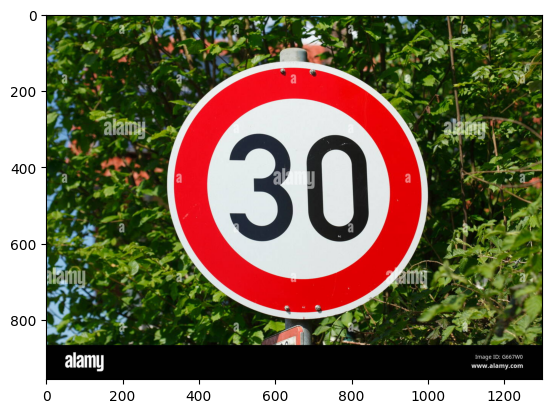

In [87]:
r = requests.get(url2, stream=True)
url_image2 = Image.open(r.raw)
plt.imshow(url_image2, cmap=plt.get_cmap('gray') )

In [88]:
url_image2_preprocessed_prediction = np.argmax(nn_model.predict(url_image2_preprocessed) ) # outputs class no./ index (ex:32)

print("predicted sign class number: ", url_image2_preprocessed_prediction)
print(f'predicted traffic sign name is: {sign_names[url_image2_preprocessed_prediction] }')
# // should be [1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
predicted sign class number:  1
predicted traffic sign name is: Speed limit (30km/h)


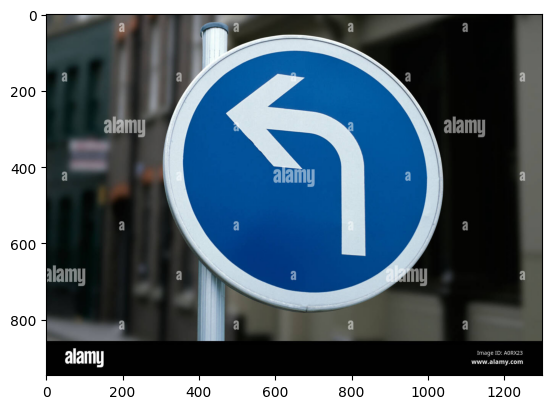

In [89]:
r = requests.get(url3, stream=True)
url_image3 = Image.open(r.raw)
plt.imshow(url_image3, cmap=plt.get_cmap('gray') )

In [90]:
url_image3_preprocessed_prediction = np.argmax(nn_model.predict(url_image3_preprocessed) ) # outputs class no./ index (ex:32)

print("predicted sign class number: ", url_image3_preprocessed_prediction)
print(f'predicted traffic sign name is: {sign_names[url_image3_preprocessed_prediction] }')
# // should be [34]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
predicted sign class number:  34
predicted traffic sign name is: Turn left ahead


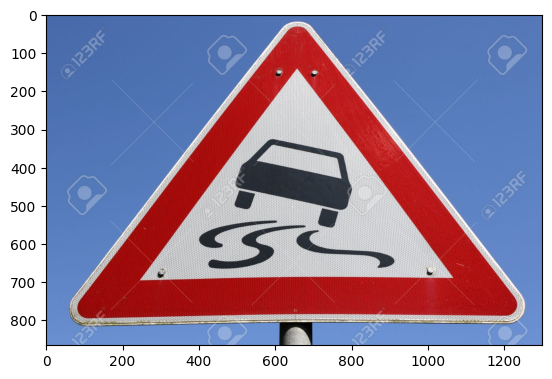

In [91]:
r = requests.get(url4, stream=True)
url_image3 = Image.open(r.raw)
plt.imshow(url_image3, cmap=plt.get_cmap('gray') )

In [92]:
url_image4_preprocessed_prediction = np.argmax(nn_model.predict(url_image4_preprocessed) ) # outputs class no./ index (ex:32)

print("predicted sign class number: ", url_image4_preprocessed_prediction)
print(f'predicted traffic sign name is: {sign_names[url_image4_preprocessed_prediction] }')
# // should be [23]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
predicted sign class number:  23
predicted traffic sign name is: Slippery road


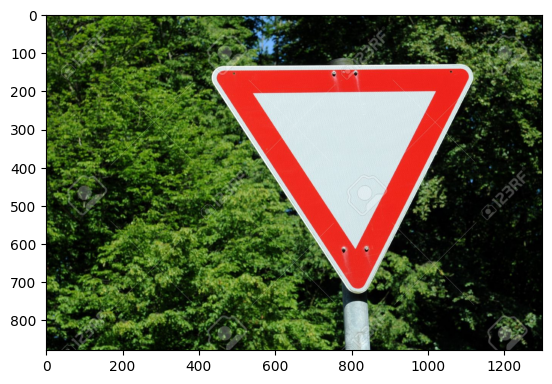

In [93]:
r = requests.get(url5, stream=True)
url_image3 = Image.open(r.raw)
plt.imshow(url_image3, cmap=plt.get_cmap('gray') )

In [94]:
url_image5_preprocessed_prediction = np.argmax(nn_model.predict(url_image5_preprocessed) ) # outputs class no./ index (ex:32)

print("predicted sign class number: ", url_image5_preprocessed_prediction)
print(f'predicted traffic sign name is: {sign_names[url_image5_preprocessed_prediction] }')
# // should be [13]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
predicted sign class number:  13
predicted traffic sign name is: Yield


___

### <span style="color:orange">12.5) Fit Generator</span>

**Above**

___

#### Notes:

**I ran it for 14 epochs then increased the epochs by 4 more with the same model by loading the saved model
before fitting it again**

___